# Python Basics

In [27]:
#| echo: false

import warnings
warnings.filterwarnings("ignore")

## Loading necessary packages
To start let's load `NumPy`, a package for scientific computing with Python. We usually load it as the `np` shorthand.

In [1]:
import numpy as np

Let's initialize two arrays

In [2]:
a = np.random.randn(1,5)
b = np.random.randn(1,5)

## Dot product
To perform a dot product of two arrays, the `shape` of the arrays should match. Let's get the shape of our arrays.

In [3]:
a.shape, b.shape

((1, 5), (1, 5))

both arrays have a shape of $(1, 5)$.

In general, the shape of the two arrays should be
$(n, k) (k, m)$, where $k$ is the common dimension of the two arrays.

For our example, we can transpose the array `b` to make the shapes match. The `NumPy` command for transposition of arrays is `.T`.

In [4]:
a.shape, b.T.shape

((1, 5), (5, 1))

Now that the two arrays have the matching shapes, we can calculate their dot product using the `@` operator.

In [5]:
a @ b.T

array([[0.56077435]])

The result of the dot product is an array of shape $(1,1)$, or a scalar. In general, the result of a dot product has a shape of $(n, m)$

## Best fit line
Let us now simulate a some data and find the **best fit line**, a line that minimizes the average distance of all data points to the line.

Here our `X` is a vector of shape $(100, 1)$ samples from a standard normal distribution. Here we have $100$ points with $1$ feature for each point.

The `y` is 10 times x, with the shape $(100, 1)$.

$$y = X \cdot coeff$$

In [11]:
X = np.random.randn(100, 1)
coeff = np.ones((1, 1)) * 10
y = X @ coeff
y.shape

(100, 1)

# Data visualization
To visualize the data, we can use [`Matplotlib`](https://en.wikipedia.org/wiki/Matplotlib), which is a python plotting library inspired by `MATLAB`. While `Matplotlib` is a low-level plotting library with a high level of flexibility, for data science and ML applications, we tend to use `seaborn`. 

`seaborn` is a high-level plotting library that contains many common plots (e.g. `countplot`, `distplot`) as pre-built functions. It also has high compatibility with `pandas` dataframes.


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

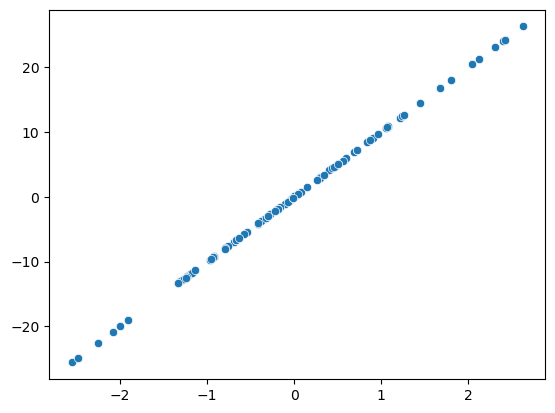

In [26]:
#| label: fig-scatterxy
#| fig-cap: "Scatter plot of y against X"

sns.scatterplot(x= X[:,0], y = y[:,0])
plt.show()

As you can see in the scatter plot @fig-scatterxy, $X$ and $y$ form a perfect line, as we didn't add any noise to our $y$ variable. 

To find the *best fit line*, we need to find $a$ in the following equation:

$$y = X \cdot a$$

$a$ would be a scalar, or an array of shape $(1,)$

# Performance measure
Since our target variable, $y$, is a continuous variable, we are dealing with a regression task. For regression **M**ean **S**quared **E**rror (MSE) is one of the most common loss functions (i.e. measure of performance).
$$MSE = \frac{1}{n} \sum_{i=1}^{n}{(y_i - \hat{y}_i)^2}$$

Thus, we define a function to calculate the average sum of the squared of the error.

In [28]:
def error_function(y,y_hat):
    return ((y - y_hat)**2).mean()

Next, we randomly initialize our a as an array of shape $(1,1)$

In [30]:
a = np.random.randn(1,1)
a

array([[-0.83905875]])

We then calculate our prediction, $\hat{y}$, which is the dot product of our design matrix, $X$, and $a$.

In [31]:
y_hat = X @ a

We use our `error_function` to measure the error of our random guess for $a$.

In [32]:
error = error_function(y,y_hat)
error

143.78458435250508

Unlike metrics, such as accuracy, loss values have little intuitive meaning for humans.

## Fitting the data using `sklearn`

In the next session, we will formulate a closed-form solution for finding the parameters of linear regression.

For now, let's use the [`scikit-learn`](https://scikit-learn.org/) package to find the best line.

We'll import the `LinearRegression` class from the `linear_model` submodule of `sklearn`. Each submodule of `sklearn` contains classes for that particular topic.

In [33]:
from sklearn.linear_model import LinearRegression

Now, let's create an instance of the `LinearRegression` model and fit it to the data.

In [34]:
model = LinearRegression()

In [35]:
model.fit(X,y)

LinearRegression()

Most `sklearn` classes involve two steps:
1. Instantiating the class. This is where you provide the necessary hyper-parameters.
    - `model = LinearRegression()`
2. Fitting the data.
    - `model.fit(X,y)`

Next, we can retrieve the coefficients of the fitted model by accessing the `.coeff_` attribute of the `model` object.

In [36]:
a = model.coef_
a

array([[10.]])

In our case, the coefficient is an array of shape $(1,1)$. This is in line with the shape of our X ($n,1$) and y ($n, 1$).

We can also access the intercept of the `model` using the `.intercept_` attribute. Since we didn't add an intercept in our data simulation, the value of the intercept should be $0$.

*Note.* In numerical computations, very small numbers (e.g. $2 \times 10^{-16}$) are considered to be $0$.

In [37]:
b = model.intercept_
b

array([2.22044605e-16])

## Plotting the line on the data
We can now plot the line and the data to see the fit.

First, we get the predictions from the model using its fitted parameters `a` and `b`.

In [38]:
y_pred = X @ a + b

We'll use `seaborn` and `Matplotlib` to create two separate plots on the same axis, `ax`.

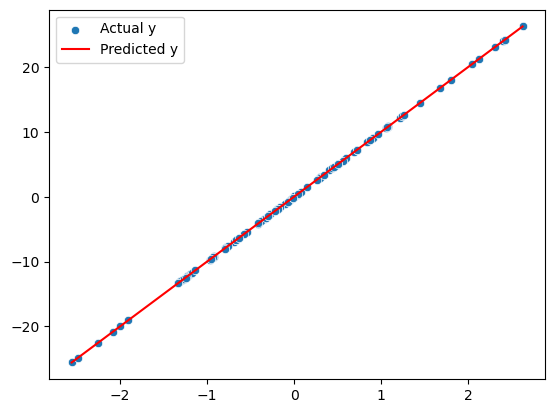

In [41]:
ax = sns.scatterplot(x=X[:,0], y=y[:,0], label="Actual y")
ax = sns.lineplot(x=X[:,0], y=y_pred[:,0], ax=ax, color='red', label="Predicted y")
ax.legend()